## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [55]:
X.isna().sum().sum()

0

Таким образом, пропущенных значений нет

In [56]:
masque = (X.dtypes == 'object').values #создали маску
X_cat = X[X.columns[masque]]
print(X_cat)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[178 rows x 0 columns]


Мы получили пустой датафрейм - категориальных данных нет

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [57]:
from sklearn import model_selection
np.random.seed(10000)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.3)
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
31,13.58,1.66,2.36,19.1,106.0,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515.0
27,13.30,1.72,2.14,17.0,94.0,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285.0
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0
86,12.16,1.61,2.31,22.8,90.0,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495.0
68,13.34,0.94,2.36,17.0,110.0,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750.0


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

prizn_train = X_train[['alcohol', 'magnesium']]
prizn_test = X_test[['alcohol', 'magnesium']]
# только 2 признака

normalizer = StandardScaler()
normalizer.fit(prizn_train)
X_train_transformed = normalizer.transform(prizn_train)
X_test_transformed = normalizer.transform(prizn_test)
#отмасштабировали

X_train = pd.DataFrame(data=X_train_transformed)
X_test = pd.DataFrame(data=X_test_transformed)

clf = []
print('NN\tTrain\tTest')
for i in [1, 3, 5, 10, 15, 25]:
  neigh = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
  neigh.fit(X_train, y_train)

  clf.append(neigh) #для задачи 1.5

  y_predicted_for_test = neigh.predict(X_test) # предсказания на тесте
  y_predicted_for_train = neigh.predict(X_train) # на тренировочной

  accuracy_train = np.mean(y_train == y_predicted_for_train)
  accuracy_test = np.mean(y_test == y_predicted_for_test)

  print(i, '\t', float('{:.2f}'.format(accuracy_train)), '\t', float('{:.2f}'.format(accuracy_test)))


NN	Train	Test
1 	 1.0 	 0.65
3 	 0.82 	 0.69
5 	 0.78 	 0.74
10 	 0.76 	 0.74
15 	 0.71 	 0.7
25 	 0.68 	 0.78


In [59]:
#print(clf[0])

**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [117]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [118]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

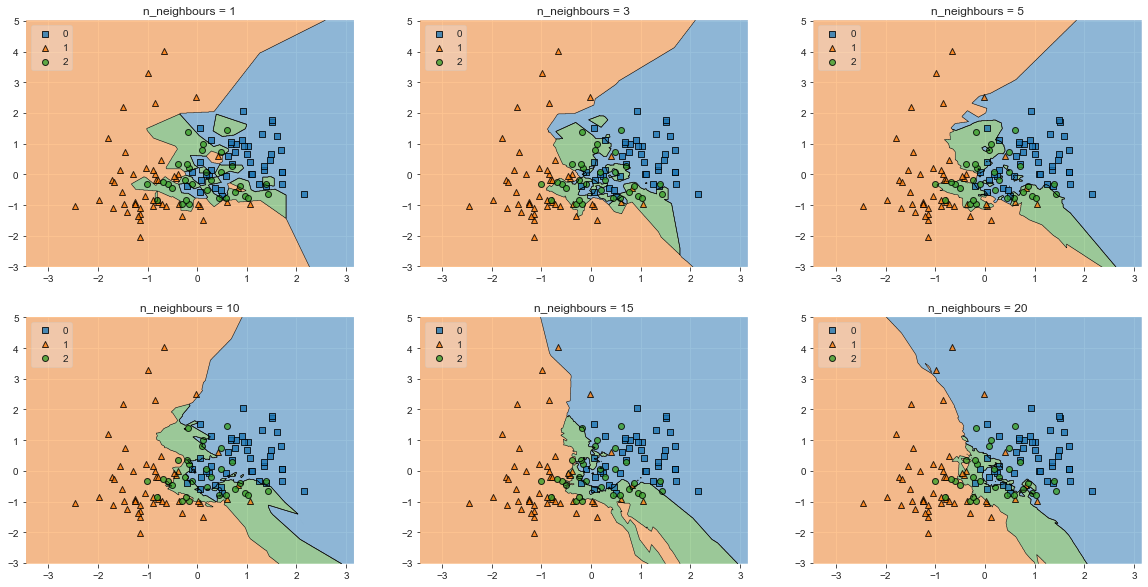

In [119]:
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
import itertools

gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(20,10))
for i, grd, n in zip(clf, itertools.product([0, 1, 2], repeat=2), [1, 3, 5, 10, 15, 20]):
  ax = plt.subplot(gs[grd[0], grd[1]])

  fig = plot_decision_regions(X=X_train.to_numpy(), y=y_train, clf=i, legend=2)
  plt.title(f'n_neighbours = {n}')

plt.show()



**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

При k = 1 модель переобучается. Мы видим это по accuracy: на тренировочной выборке доля верных ответов = 1, а на тестовой гораздо меньше. Также на графике: объекты "обводятся", разделяющие поверхности слишком четкие. На тренировочной выборке ближайший сосед и есть этот объект.
При k = 3 распределение зон уже лучше, но все равно еще слишком "подогнано".

Решающая поверхность при К = 15 на графике весьма ломаная, да и accuracy при таком гиперпараметре не лучшая.

Наибольшую долю верных ответов мы видим при k = 5, 10 и 25.
K = 25 слишком велико, может слишком "обобщать".

К = 10 и К = 5 имеют наилучшие графики по плавности и самые высокие accuracy.  Выбираем между этими гиперпараметрами.

k = 5, я считаю, является лучшим значением, поскольку accuracy высока и на train, и на test, а графически границы наиболее плавные.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

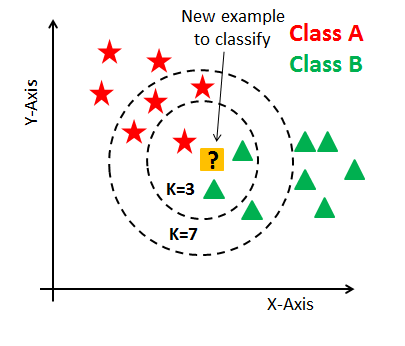

In [267]:
import numpy as np
from collections import Counter
import statistics
from statistics import mode

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
      # YOUR CODE HERE
      self.x1 = X[:, 0]
      self.x2 = X[:, 1]
      self.y = y
    
    def predict(self, X):
      r = []
      for i in X:
        self.manh = np.abs(self.x1 - i[0]) + np.abs(self.x2 - i[1]) #манхэттэнская метрика
        self.m = pd.DataFrame(data = {'path':self.manh, 'y':self.y})
        self.m = self.m.sort_values('path')
        r.append(mode(self.m['y'].head(self.k)))
      return np.array(r)


      # YOUR CODE HERE

      #pass

In [268]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [269]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [71]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [72]:
data.isna().sum().sum()

0

следовательно, пропущенных значений нет

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [73]:
data = data.drop(data.columns[0], axis = 1)
print(data.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [74]:
mask = (data.dtypes == 'object').values
data[data.columns[~mask]].corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Наибольшая корреляция с price выявлена у признаков carat, x, y, z.

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [75]:
data_dum = pd.get_dummies(data, drop_first=True)
data_dum.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [76]:
np.random.seed(10000)
data_y = data_dum.price
data_x = data_dum.drop('price', axis = 1)
x_train, x_test, y_train, y_test = model_selection.train_test_split(data_x, data_y, test_size=.3)
x_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
21225,1.28,62.7,53.0,6.94,6.97,4.36,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
34531,0.33,62.2,57.0,4.41,4.46,2.76,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
45721,0.55,62.7,55.0,5.26,5.24,3.29,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
36769,0.34,62.2,56.0,4.47,4.44,2.77,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
50820,0.71,62.0,56.0,5.72,5.77,3.56,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [77]:
normal = StandardScaler()
normal.fit(x_train)
x_train = normal.transform(x_train)
x_test = normal.transform(x_test)

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [78]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.023554,0.664831,-1.987715,1.082597,1.107313,1.188434,-0.318475,1.229502,-0.586546,-0.536952,...,-0.428052,-0.332951,-0.234745,-0.186716,-0.566809,-0.455334,2.380649,-0.541330,-0.268726,-0.321593
1,-0.987106,0.315648,-0.205358,-1.177865,-1.136223,-1.119750,-0.318475,1.229502,-0.586546,-0.536952,...,-0.428052,-0.332951,-0.234745,-0.186716,-0.566809,-0.455334,-0.420053,-0.541330,3.721266,-0.321593
2,-0.521479,0.664831,-1.096537,-0.418421,-0.439028,-0.355164,-0.318475,1.229502,-0.586546,-0.536952,...,-0.428052,-0.332951,-0.234745,-0.186716,-0.566809,-0.455334,-0.420053,1.847303,-0.268726,-0.321593
3,-0.965941,0.315648,-0.650948,-1.124257,-1.154100,-1.105324,-0.318475,1.229502,-0.586546,-0.536952,...,-0.428052,-0.332951,-0.234745,-0.186716,-0.566809,-0.455334,2.380649,-0.541330,-0.268726,-0.321593
4,-0.182842,0.175975,-0.650948,-0.007428,0.034707,0.034342,-0.318475,1.229502,-0.586546,-0.536952,...,-0.428052,-0.332951,-0.234745,-0.186716,1.764263,-0.455334,-0.420053,-0.541330,-0.268726,-0.321593


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train, y_train)
print(f"Train: {mean_squared_error(y_train, lr.predict(x_train))}")
print(f"Test: {mean_squared_error(y_test, lr.predict(x_test))}")
#материалы семинара 6

Train: 1251234.4983510808
Test: 1338130.5361190573


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [97]:
coef = pd.DataFrame(data_x.columns)
coef['COEF'] = lr.coef_
coef

,0,COEF
0,carat,5348.339161
1,depth,-91.790809
2,table,-57.973672
3,x,-1209.707228
4,y,60.320422
5,z,-42.128281
6,cut_Good,173.983096
7,cut_Ideal,411.517671
8,cut_Premium,332.024705
9,cut_Very Good,307.433464


По модулю превышают оценки прочих вещ. переменных: carat, x, clarity_SI1, clarity_VS1, clarity_VS2, clarity_VVS1, clarity_VVS2

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [104]:
from sklearn.linear_model import Lasso, Ridge
lasso = Lasso(10).fit(x_train, y_train)
print(f'Lasso\ntrain: {mean_squared_error(y_train, lasso.predict(x_train))}\ntest: {mean_squared_error(y_test, lasso.predict(x_test))}')

ridge = Ridge(10).fit(x_train, y_train)
print(f'Ridge\ntrain: {mean_squared_error(y_train, ridge.predict(x_train))}\ntest: {mean_squared_error(y_test, ridge.predict(x_test))}')

coef['lasso'] = lasso.coef_
coef['ridge'] = ridge.coef_
print(coef)

Lasso
train: 1310451.9832626441
test: 1411158.003307487
Ridge
train: 1251363.420245354
test: 1338423.0249892138
                0         COEF        lasso        ridge
0           carat  5348.339161  4860.158838  5309.523431
1           depth   -91.790809   -96.868807   -88.337560
2           table   -57.973672   -67.622954   -58.113616
3               x -1209.707228  -704.940794 -1145.744113
4               y    60.320422    -0.000000    49.789479
5               z   -42.128281   -42.969518   -58.768815
6        cut_Good   173.983096    51.052137   174.658574
7       cut_Ideal   411.517671   209.426399   412.790935
8     cut_Premium   332.024705   146.529497   332.842824
9   cut_Very Good   307.433464   139.970433   308.958971
10        color_E   -71.312400    -2.083920   -70.992784
11        color_F   -97.207230   -32.615465   -97.137662
12        color_G  -187.512840  -111.317255  -187.075008
13        color_H  -349.700481  -277.951080  -348.916245
14        color_I  -431.566841  -

Мы видим, что Lasso обнулила признак y -> она посчитала его незначимым лдя предсказания. Также были значительно уменьшены коэффициенты (в несколько раз), а при color на 97%. Сохранила большие веса у значимых признаков, выявленных нами ранее: carat, некоторые из clarity.
RIDGE не обнулила ни 1 из коэффициентов,но многие были уменьшены по модулю.
При этом MSE при Lasso увеличилась, а при RIDGE почти не изменилась

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

Text(0.5, 1.0, 'Ridge')

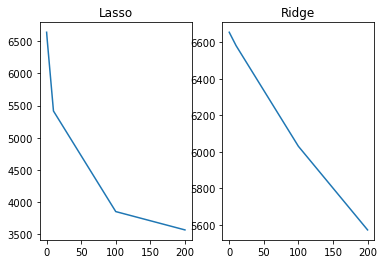

In [123]:
#norms = np.array()
absc = [0.1, 1, 10, 100, 200]
ordin = []
ordinR = []
for a in absc:
  lasso = Lasso(a).fit(x_train, y_train)
  ordin.append(np.linalg.norm(lasso.coef_))
  ridge = Ridge(a).fit(x_train, y_train)
  ordinR.append(np.linalg.norm(ridge.coef_))

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(absc, ordin)
ax1.set_title('Lasso')
ax2.plot(absc, ordinR)
ax2.set_title('Ridge')

Lasso агрессивнее уменьшает веса, мы можем убедиться в этом по графикам. Именно поэтому этот метод часто используют для отбора признаков. Она более кардинально уменьшает, зануляет характеристики, делает акцент только на значимых переменных.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [160]:
from sklearn.linear_model import LassoCV
m = LassoCV(cv = 5, alphas = absc)
m.fit(x_train, y_train)

matr = pd.DataFrame(m.mse_path_)
matr['mean'] = matr.mean(axis = 1)
matr['alpha'] = m.alphas_
print(matr)
print('значение alpha, которое даёт наибольшее качество = ', matr.alpha[matr['mean'].idxmin()])

D:\programs\anaconda3\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 852472080.2134323, tolerance: 46932134.79050054
  model = cd_fast.enet_coordinate_descent_gram(


              0             1             2             3             4  \
0  2.103739e+06  2.025652e+06  2.067984e+06  2.301739e+06  2.081881e+06   
1  1.726060e+06  1.673043e+06  1.716914e+06  1.925691e+06  1.725460e+06   
2  1.265905e+06  1.260028e+06  1.294041e+06  1.434843e+06  1.315616e+06   
3  1.207174e+06  1.223219e+06  1.239927e+06  1.353548e+06  1.255737e+06   
4  1.206818e+06  1.225399e+06  1.239636e+06  1.353100e+06  1.254580e+06   

           mean  alpha  
0  2.116199e+06  200.0  
1  1.753434e+06  100.0  
2  1.314087e+06   10.0  
3  1.255921e+06    1.0  
4  1.255907e+06    0.1  
значение alpha, которое даёт наибольшее качество =  0.1


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [169]:
las = Lasso(0.1)
las.fit(x_train, y_train)
d = pd.DataFrame(las.coef_, index = data_x.columns )
d

,0
carat,5343.819590
depth,-92.184540
table,-58.103242
x,-1197.424731
y,49.835395
z,-39.875001
cut_Good,172.905100
cut_Ideal,409.712902
cut_Premium,330.229839
cut_Very Good,306.008456


Как мы и предполагали первоначально, carat и различные виды clarity являются наиболее значимыми - это размер карата (мера драгоценных камней) и качество бриллианта. Довольно неинформативны значения ширины и высоты (y, z).

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [172]:
print('MSE for alpha = .1 in LASSO:', mean_squared_error(y_test, las.predict(x_test)))
print(f"LinearRegression MSE: {mean_squared_error(y_test, lr.predict(x_test))}")

MSE for alpha = .1 in LASSO: 1338132.1665864645
LinearRegression MSE: 1338130.5361190573


Как ни странно, но ошибка на линейной регрессии меньше, хоть и не намного. Я считаю, что для предсказаний все-таки лучше использовать Lasso, поскольку так учитыввается регуляризация, не будут значительные отклонения при небольших изменениях признаков, имеющих изначально огромные веса.
Возможно при другом наборе данных (изменить random.seed) модель Lasso покажет лучший результат.